# 서포트 벡터 머신

In [154]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

%matplotlib inline

In [155]:
# matplotlib.rc("font", family = "Malgun Gothic")

In [156]:
df_raw = pd.read_csv("유방암.csv", engine="python")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [157]:
#결측치 확인
df_raw.isnull().sum(axis = 0)
# 결측치 없음

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [158]:
#더미변수 생성- 행렬의 문자형 요소들을 모두 float숫자형으로 바꿔줌.
df_raw_dummy = pd.get_dummies(df_raw)

#더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [159]:
df_raw_y = df_raw_dummy["diagnosis"]
df_raw_x = df_raw_dummy.drop("diagnosis",axis=1, inplace=False)

In [160]:
# train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size=(3/7), random_state=1234)


print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))


train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [161]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

#train, test 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))


Accuracy on training set:0.912
Accuracy on test set:0.895


In [162]:
# 모델 옵션 확인
svm_uncustomized

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [163]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; validation_accuracy=[]
para_c=[10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234, gamma="auto")
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["ValidationAccuracy"] = validation_accuracy

In [164]:
df_accuracy_c.round(3)

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.63,0.637
1,0.10,0.63,0.637
2,1.00,1.00,0.637
3,10.00,1.00,0.637


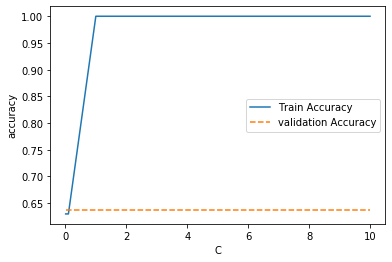

In [165]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c, validation_accuracy,linestyle="--",label="validation Accuracy")
plt.ylabel("accuracy");plt.xlabel("C")
plt.legend()

In [166]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; validation_accuracy=[]
# c:규제(0.01,0.1,1,10)
para_c1=[0.1*c for c in range(1,11)]
# para_c=[0.1*c for c in range(1,10)] # C변화 구간 변경

for v_C in para_c1:
    svm = SVC(C=v_C,random_state=1234, gamma="auto")
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
    
# 데이터 테이블로 저장
df_accuracy_c1 = pd.DataFrame()
df_accuracy_c1["C"] = para_c1
df_accuracy_c1["TrainAccuracy"]=train_accuracy
df_accuracy_c1["validationAccuracy"] = validation_accuracy


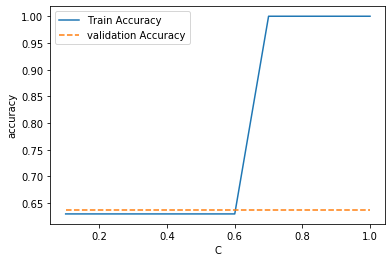

In [167]:
# 모델 정확도 그래프 확인
plt.plot(para_c1, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c1, validation_accuracy,linestyle="--",label="validation Accuracy")
plt.ylabel("accuracy");plt.xlabel("C")
plt.legend()

In [168]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; validation_accuracy=[]
# gamma:규제(0.01,0.1,1,10)
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma, C=0.6, random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["validationAccuracy"] = validation_accuracy

In [169]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,validationAccuracy
0,0.01,0.9956,0.6374
1,0.10,0.6300,0.6374
2,1.00,0.6300,0.6374
3,10.00,0.6300,0.6374


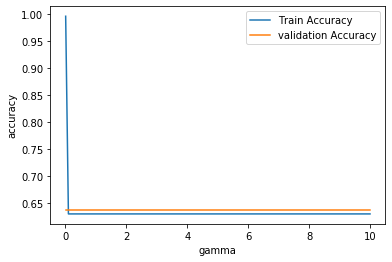

In [170]:
#모델 정확도 그래프 확인
plt.plot(para_gamma,train_accuracy,linestyle="-",label ="Train Accuracy")
plt.plot(para_gamma,validation_accuracy,linestyle="-",label ="validation Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

# 스케일링

In [171]:
# 변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [172]:
# train(0.4) : validation(0.3) : test(0.3) )의 비율로 데이터 분할
df_scaled_x, df_scaled_test_x = train_test_split(df_raw_x, test_size=0.3, random_state=1234)
df_scaled_train_x, df_scaled_validation_x = train_test_split(df_scaled_x, test_size=(3/7), random_state=1234)


print("train data X size : {}".format(df_scaled_train_x.shape))
print("validation data X size : {}".format(df_scaled_validation_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (227, 30)
validation data X size : (171, 30)
test data X size : (171, 30)


In [173]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(svm_scaled.score(df_scaled_validation_x,df_validation_y)))

Accuracy on training set:0.912
Accuracy on test set:0.901


In [174]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; validation_accuracy=[]
# c:규제(0.01,0.1,1,10)
para_c=[10 **c for c in range(-2,2)]
# para_c=[0.1 *c for c in range(1,30)]     #세밀하게 바라보고 싶을 때



for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)#,gamma="auto")
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["validationAccuracy"] = validation_accuracy


In [175]:
#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,validationAccuracy
0,0.01,0.630,0.614
1,0.10,0.899,0.573
2,1.00,0.912,0.573
3,10.00,0.930,0.573


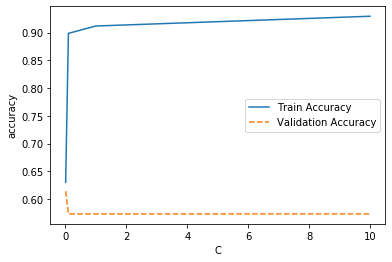

In [176]:
#모델 정확도 그래프 확인
plt.plot(para_c,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c,validation_accuracy,linestyle="--",label="Validation Accuracy")
plt.ylabel("accuracy");plt.xlabel("C")
plt.legend()

In [177]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; validation_accuracy=[]
# gamma:규제(0.01,0.1,1,10)
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma, C=0.5, random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["validationAccuracy"] = validation_accuracy

In [178]:
#Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,validationAccuracy
0,0.01,0.63,0.614
1,0.10,0.63,0.614
2,1.00,0.63,0.614
3,10.00,0.63,0.614


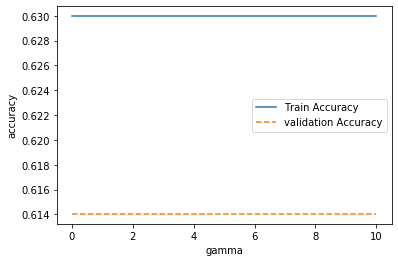

In [179]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_gamma,validation_accuracy,linestyle="--",label="validation Accuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()


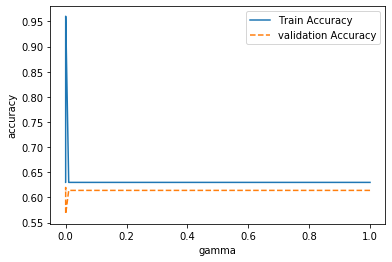

In [180]:
# ---> 그래프를 확인해보니 gamma변화는 정확도에 영향을 미치지 않음. 따라서 가마 변화 구간을 변경하여야 함.

# train 및 test 정확도 결과 저장용
train_accuracy=[]; validation_accuracy=[]
# gamma:규제(0.01,0.1,1,10)
para_gamma = [0.01**gamma for gamma in range(0,10)] #가마 변화 구간을 변경하자!

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma, C=0.5, random_state=1234) #나는 C값을 0.1로 설정
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["validationAccuracy"] = validation_accuracy

# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_gamma,validation_accuracy,linestyle="--",label="validation Accuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

In [181]:
# 최종모델
svc_final = SVC(gamma = 0.0001, C=0.5,random_state=1234) #gamma = 0, C=0.5를 선정.
svc_final.fit(df_scaled_train_x,df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)

#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(svc_final.score(df_scaled_train_x,df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(svc_final.score(df_scaled_test_x,df_test_y)))
# confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.960
Accuracy on test set:0.936
Confusion matrix:
[[101   4]
 [  7  59]]


In [182]:
estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid={"C":para_c,"gamma":para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf=GridSearchCV(estimator,param_grid,scoring="accuracy",n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)

# 최적의 c와 감마값 도출
print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbst parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(4)))

best estimator model:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

bst parameter:
{'C': 10, 'gamma': 0.0001}

best score:
0.9605
